In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../Data/Sample - Superstore.csv", encoding="ISO-8859-1")


# Preview the first 5 rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a Month-Year column for time-based analysis
df['Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)


In [11]:
# Group total sales by Month-Year
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()
monthly_sales.head()


,Month-Year,Sales
0,2014-01,14236.895
1,2014-02,4519.892
2,2014-03,55691.009
3,2014-04,28295.345
4,2014-05,23648.287


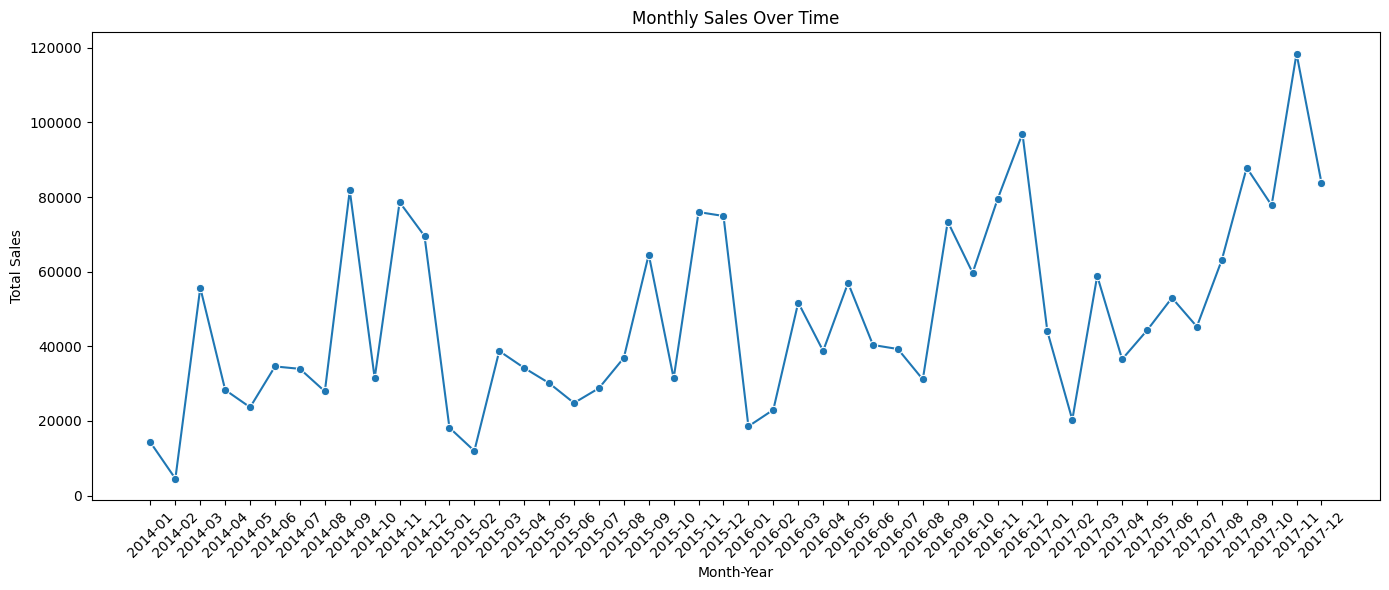

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o')

# Make it look clean
plt.xticks(rotation=45)
plt.title('Monthly Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
# Group profit by Category and Sub-Category
category_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
category_profit.head()
# Sort by profit for better visualization
category_profit = category_profit.sort_values(by='Profit', ascending=True)


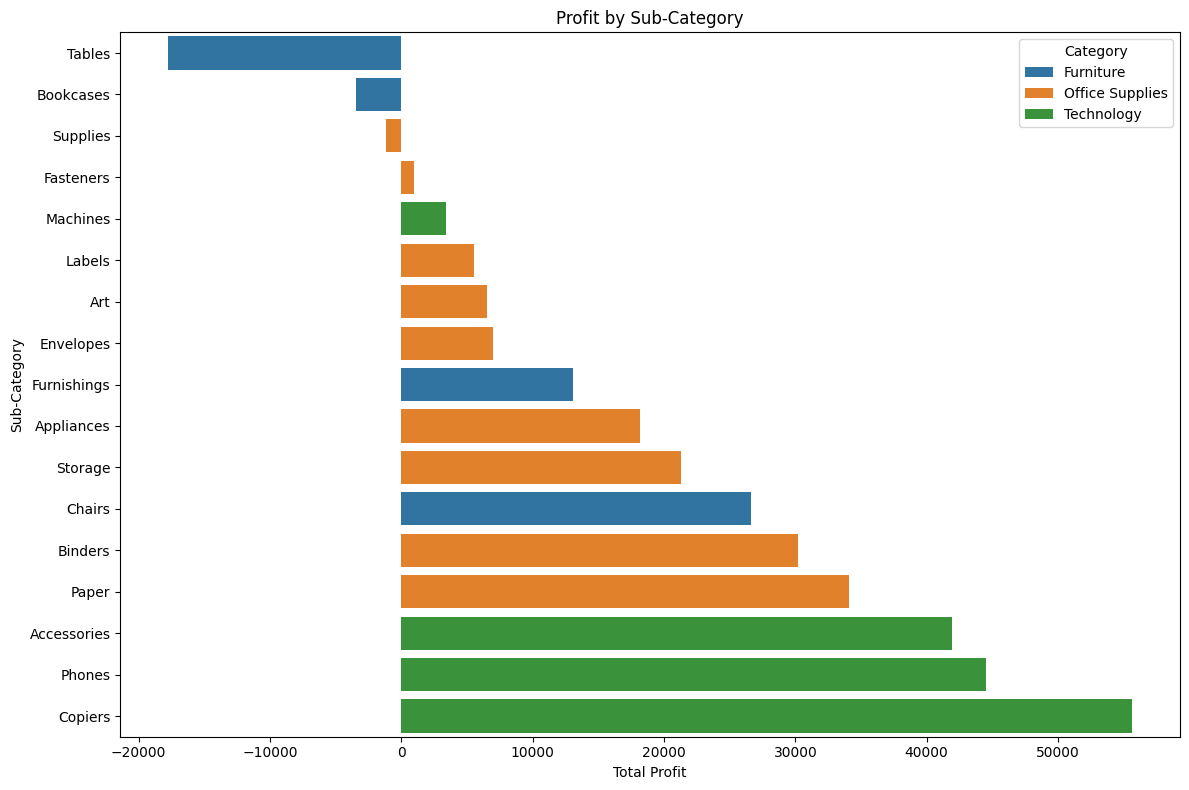

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(data=category_profit, 
            x='Profit', 
            y='Sub-Category', 
            hue='Category', 
            dodge=False)

plt.title('Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()


In [15]:
# Group sales and profit by customer segment
segment_performance = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
segment_performance



,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


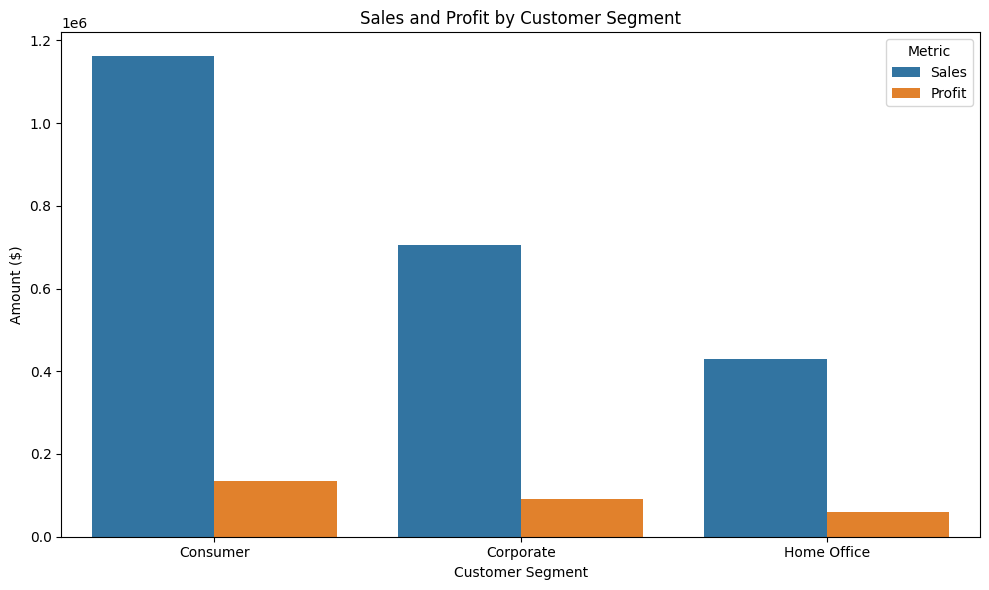

In [16]:
# Melt the dataframe to long format for easier plotting
melted_segment = pd.melt(segment_performance, id_vars='Segment', 
                         value_vars=['Sales', 'Profit'], 
                         var_name='Metric', value_name='Amount')

# Plot side-by-side bars
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_segment, x='Segment', y='Amount', hue='Metric')

plt.title('Sales and Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Amount ($)')
plt.tight_layout()
plt.show()


In [ ]:
# Check for missing values
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Check the data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# View summary statistics for numeric columns
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Convert 'Order Date' and 'Ship Date' to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])


In [9]:
# Confirm the data types after conversion
df[["Order Date", "Ship Date"]].dtypes


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object